In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

from IPython.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))
plt.rcParams['xtick.major.pad']='0'

In [2]:
# Set up methods' colors
methods_colors = {
    "oracle": "#FFFFFF",  # 70FF00 (old bright green color)
    "avg_ens": "#FF7133", #FF7133 -> FF9664 (lighter)
    "best_ms": "#33D4FF",
    "detectors": "#CCCCCC",
    "feature_based": "#91AAC2",
    "sit": "#FFB522",
    "conv": "#4494FF",
    "conv_2": "#0048FF",
    "rocket": "#EA7DFF", #B400FF -> D800FF -> EA7DFF(lighter)
    "best_ad_train": "#228B22",
    "worst_ad_test": "#8B0000",
}

In [3]:
from omegaconf import OmegaConf

import hydra

config = OmegaConf.load("../../conf/config.yaml")
current_dataset = config.mts_running_dataset
mts_current_metric_for_optimization = config.mts_current_metric_for_optimization
current_dataset, mts_current_metric_for_optimization

('settings_six', 'VUS_PR')

# Get results data

This file contains the accuracy scores for 496 time series (time series in the test set that were not used for training the model selection methods).

**Make sure to change to the name of the file that you want to read from**

In [4]:
# Uncomment this command and all plt.savefig(...) commands to save the generated figures
# figure_path = 'dummy/path/{}.svg'

df = pd.read_csv(f'../../results_mts/label_by_{mts_current_metric_for_optimization}/merged_scores/{current_dataset}/current_inference_time.csv')
if 'Unnamed: 0' in df.columns:
    df = df.drop(labels='Unnamed: 0', axis=1)
df = df.rename(columns={"Avg Ens.": "Avg Ens"})

methods_conv = [
    # 'inception_time_{}',
    'convnet_{}',
    'resnet_{}',]

methods_sit = [
    # 'sit_conv_{}',
    # 'sit_linear_{}',
    # 'sit_stem_{}',
    # 'sit_stem_relu_{}',
]

methods_ts = ['rocket_{}']

methods_feature = [
    'ada_boost_{}',
    'knn_{}',
    'decision_tree_{}',
    'random_forest_{}',
    'mlp_{}',
    'bayes_{}',
    'qda_{}',
    'svc_linear_{}'
]

# old_methods = ['IFOREST', 'LOF', 'MP', 'NORMA', 'IFOREST1', 'HBOS', 'OCSVM','PCA', 'AE', 'CNN', 'LSTM', 'POLY']
old_methods = ['CBLOF', 'RobustPCA', 'COPOD', 'HBOS', 'LOF', 'PCC', 'AutoEncoder (AE)', 'DenoisingAutoEncoder (DAE)', 'Torsk', 'Random Black Forest (RR)']

Base_methods = ['Avg Ens']

# all_length = [16, 32, 64, 128, 256, 512, 768, 1024]
all_length = [16, 32, 64, 128, 256]

all_methods = old_methods + Base_methods
all_methods += [meth.format(length) for meth in methods_conv for length in all_length]
all_methods += [meth.format(length) for meth in methods_sit for length in all_length]
all_methods += [meth.format(length) for meth in methods_ts for length in all_length]
all_methods += [meth.format(length) for meth in methods_feature for length in all_length]

all_methods_pred = [meth.format(length)+"_pred" for meth in methods_conv for length in all_length]
all_methods_pred += [meth.format(length)+"_pred" for meth in methods_sit for length in all_length]
all_methods_pred += [meth.format(length)+"_pred" for meth in methods_ts for length in all_length]
all_methods_pred += [meth.format(length)+"_pred" for meth in methods_feature for length in all_length]

all_methods_class = list(set([x.rsplit('_', 1)[0] for x in all_methods]))

# Create a list of all different classes of methods
split = [x.rsplit('_', 1)[0] for x in all_methods]
used = set()
all_methods_class = [x for x in split if x not in used and (used.add(x) or True)]

df

,dataset,filename,tran_ad,cblof,random_black_forest,copod,hbos,omni_anomaly,encdec_ad,denoising_auto_encoder,...,convnet_default_256,sit_stem_relu_16_class,sit_stem_relu_16_pred,sit_stem_relu_16,bayes_128_class,bayes_128_pred,bayes_128,qda_32_class,qda_32_pred,qda_32
0,settings_six,synthetic_batch_1296.out,0.680045,0.152688,0.196603,0.013786,0.037906,0.741472,1.570700,0.328448,...,0.343283,tran_ad,0.024642,0.704687,auto_encoder,0.001226,0.340220,tran_ad,0.001448,0.681493
1,settings_six,synthetic_batch_995.out,0.434137,0.152740,0.226630,0.016076,0.045944,0.537183,1.873377,0.369510,...,0.367426,tran_ad,0.027532,0.461669,auto_encoder,0.001231,0.364505,auto_encoder,0.001469,0.364743
2,settings_six,synthetic_batch_701.out,0.387088,0.134687,0.211786,0.015220,0.042818,0.531908,1.670048,0.346789,...,0.139119,tran_ad,0.020941,0.408029,auto_encoder,0.001232,0.345125,auto_encoder,0.001448,0.345341
3,settings_six,synthetic_batch_1341.out,0.752225,0.140294,0.261716,0.020804,0.052773,0.649500,2.176501,0.404061,...,0.144976,tran_ad,0.031360,0.783585,auto_encoder,0.001238,0.426052,tran_ad,0.001511,0.753736
4,settings_six,synthetic_batch_965.out,0.520894,0.147003,0.257005,0.023345,0.052311,0.632807,2.160892,0.389978,...,0.151483,tran_ad,0.027715,0.548609,auto_encoder,0.001240,0.418710,auto_encoder,0.001497,0.418967
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
968,settings_six,synthetic_batch_712.out,0.724235,0.157389,0.256062,0.020126,0.052355,0.634554,2.020478,0.426580,...,0.162007,tran_ad,0.027517,0.751752,auto_encoder,0.001240,0.374000,auto_encoder,0.001500,0.374260
969,settings_six,synthetic_batch_1285.out,0.452682,0.150981,0.263431,0.020153,0.050719,0.610993,1.953732,0.399804,...,0.404207,tran_ad,0.027640,0.480322,auto_encoder,0.001235,0.404247,tran_ad,0.001482,0.454164
970,settings_six,synthetic_batch_986.out,0.308191,0.139215,0.179724,0.014966,0.034882,0.416109,1.311016,0.296196,...,0.143797,tran_ad,0.020763,0.328954,auto_encoder,0.001219,0.297282,auto_encoder,0.001433,0.297496
971,settings_six,synthetic_batch_1118.out,0.579945,0.131774,0.185880,0.015882,0.037688,0.687614,1.439217,0.321889,...,0.135971,tran_ad,0.020786,0.600731,auto_encoder,0.001222,0.278596,auto_encoder,0.001426,0.278800


### Define camera-ready method names

In [10]:
# all_length = [16, 32, 64, 128, 256, 512, 768, 1024]
# all_length = [32]

template_names = {
    # 'auc_pr_vote_4': 'Vote-4',
    # 'auc_pr_average_4': 'Avg-4',
    'inception_time_{}': 'InceptTime-{}',
    'inception_time_default_{}': 'InceptTime-{}',
    'inception_time_{}_{}_{}': 'InceptTime-{}-{}',
    'inception_time_default_{}_{}_{}': 'InceptTime-{}-{}',
    'convnet_{}': 'ConvNet-{}',
    'convnet_default_{}': 'ConvNet-{}',
    'convnet_default_{}_{}_{}': 'ConvNet-{}-{}',
    # 'convnet_default_average_{}': 'ConvNet-Avg-{}',
    'resnet_{}': 'ResNet-{}',
    'resnet_default_{}': 'ResNet-{}',
    'resnet_default_{}_{}_{}': 'ResNet-{}-{}',
    # 'resnet_default_avg_{}': 'ResNet-Avg-{}',
    'sit_conv_patch_{}': 'SiT-conv-{}',
    'sit_linear_patch_{}': 'SiT-linear-{}',
    'sit_stem_original_{}': 'SiT-stem-orig-{}',
    'sit_stem_relu_{}': 'SiT-stem-ReLU-{}',
    
    'sit_conv_patch_{}_{}_{}': 'SiT-conv-{}-{}',
    'sit_linear_patch_{}_{}_{}': 'SiT-linear-{}-{}',
    'sit_stem_original_{}_{}_{}': 'SiT-stem-orig-{}-{}',
    'sit_stem_relu_{}_{}_{}': 'SiT-stem-ReLU-{}-{}',
    
    'rocket_{}': 'Rocket-{}',
    'rocket_{}_{}_{}': 'Rocket-{}-{}',
    
    'ada_boost_{}': 'AdaBoost-{}',
    'knn_{}': 'kNN-{}',
    'decision_tree_{}': 'DecisionTree-{}',
    'random_forest_{}': 'RandomForest-{}',
    'mlp_{}': 'MLP-{}',
    'bayes_{}': 'Bayes-{}',
    'qda_{}': 'QDA-{}',
    'svc_linear_{}': 'SVC-{}',
    
    'ada_boost_{}_{}_{}': 'AdaBoost-{}-{}',
    'knn_{}_{}_{}': 'kNN-{}-{}',
    'decision_tree_{}_{}_{}': 'DecisionTree-{}-{}',
    'random_forest_{}_{}_{}': 'RandomForest-{}-{}',
    'mlp_{}_{}_{}': 'MLP-{}-{}',
    'bayes_{}_{}_{}': 'Bayes-{}-{}',
    'qda_{}_{}_{}': 'QDA-{}-{}',
    'svc_linear_{}_{}_{}': 'SVC-{}-{}',
    
    'IFOREST': 'IForest',
    'LOF': 'LOF',
    'MP': 'MP',
    'NORMA': 'NormA',
    'IFOREST1': 'IForest1',
    
    'CBLOF': 'CBLOF',
    'cblof': 'CBLOF',
    'COF': 'COF',
    'RobustPCA': 'RobustPCA',
    'COPOD': 'COPOD',
    'copod': 'COPOD',
    'PCC': 'PCC',
    'HBOS': 'HBOS',
    'hbos': 'HBOS',
    'OCSVM': 'OCSVM',
    'PCA': 'PCA',
    'Torsk': 'TORSK',
    'tran_ad': 'TranAD',
    # 'AE': 'AE',
    'AutoEncoder (AE)': 'AE',
    'auto_encoder': 'AE',
    'DenoisingAutoEncoder (DAE)': 'DAE',
    'denoising_auto_encoder': 'DAE',
    'encdec_ad': 'EncDec-AD',
    'Random Black Forest (RR)': 'RBF',
    'random_black_forest': 'RBF',
    'omni_anomaly': 'OmniAnomaly',
    'mtad_gat': 'MTAD-GAT',
    
    'CNN': 'CNN',
    'LSTM': 'LSTM',
    'POLY': 'POLY',
    'Avg Ens': 'Avg Ens',
    'Oracle': 'Oracle',
    'Oracle_new': 'Oracle_new',
    'VUS_PR': 'VUS-PR',
    'label': 'Label',
    'best_ms': 'Best MS v1 \n {}',
    'best_ms_v2': 'Best MS v2 \n {}',
    'convnet': 'ConvNet',
    'resnet': 'ResNet',
    'rocket': 'Rocket',
    'knn': 'kNN',
    'sit_stem': 'SiT-stem',
    'sit': 'SiT',
    'feature_based': 'Feature-based',
    'AUC_PR': 'AUC-PR',
    'AUC_ROC': 'AUC-ROC',
    'VUS_ROC': 'VUS_ROC',
    'INTERPRETABILITY_LOG_SCORE':'INTERPRETABILITY_LOG_SCORE',
    'INTERPRETABILITY_HIT_1_SCORE': 'HIT_1_SCORE',
    'INTERPRETABILITY_HIT_2_SCORE': 'HIT_2_SCORE',
    'INTERPRETABILITY_HIT_3_SCORE': 'HIT_3_SCORE',
    'INTERPRETABILITY_HIT_4_SCORE': 'HIT_4_SCORE',
    'INTERPRETABILITY_HIT_5_SCORE': 'HIT_5_SCORE',
    'INTERPRETABILITY_HIT_6_SCORE': 'HIT_6_SCORE',
    'INTERPRETABILITY_HIT_7_SCORE': 'HIT_7_SCORE',
    'INTERPRETABILITY_HIT_8_SCORE': 'HIT_8_SCORE',
    'INTERPRETABILITY_HIT_9_SCORE': 'HIT_9_SCORE',
    'INTERPRETABILITY_HIT_10_SCORE': 'HIT_10_SCORE'
}


all_length = [16, 32, 64, 128, 256]
final_names = {}
for length in all_length:
    for key, value in template_names.items():
        if '{}' in key and '{}_{}_{}' not in key:
            new_key = key.format(length)
            new_value = value.format(length)
            final_names[new_key] = new_value
        elif '{}_{}_{}' in key:
            for method in ['vote', 'average']:
                for k in [1,2,3,4]:
                    new_key = key.format(length, method, k)
                    new_value = value.format(length, f'{method[:2]}{k}')
                    final_names[new_key] = new_value
        else:
            final_names[key] = value
print(final_names)

{'inception_time_16': 'InceptTime-16', 'inception_time_default_16': 'InceptTime-16', 'inception_time_16_vote_1': 'InceptTime-16-vo1', 'inception_time_16_vote_2': 'InceptTime-16-vo2', 'inception_time_16_vote_3': 'InceptTime-16-vo3', 'inception_time_16_vote_4': 'InceptTime-16-vo4', 'inception_time_16_average_1': 'InceptTime-16-av1', 'inception_time_16_average_2': 'InceptTime-16-av2', 'inception_time_16_average_3': 'InceptTime-16-av3', 'inception_time_16_average_4': 'InceptTime-16-av4', 'inception_time_default_16_vote_1': 'InceptTime-16-vo1', 'inception_time_default_16_vote_2': 'InceptTime-16-vo2', 'inception_time_default_16_vote_3': 'InceptTime-16-vo3', 'inception_time_default_16_vote_4': 'InceptTime-16-vo4', 'inception_time_default_16_average_1': 'InceptTime-16-av1', 'inception_time_default_16_average_2': 'InceptTime-16-av2', 'inception_time_default_16_average_3': 'InceptTime-16-av3', 'inception_time_default_16_average_4': 'InceptTime-16-av4', 'convnet_16': 'ConvNet-16', 'convnet_defaul

# Overview of the experimental analysis

In this section, we compare the existing detectors with the Averaging Ensemble, the Oracle, and one of the best model selection methods from our experimental evaluation. Here we compare the inference time: The time required to predict which detector to use and to run it.

In [11]:
from utils.config import multivariate_detector_names

detector_names = multivariate_detector_names
detector_names

['cblof',
 'auto_encoder',
 'copod',
 'denoising_auto_encoder',
 'encdec_ad',
 'hbos',
 'omni_anomaly',
 'random_black_forest',
 'tran_ad',
 'mtad_gat']

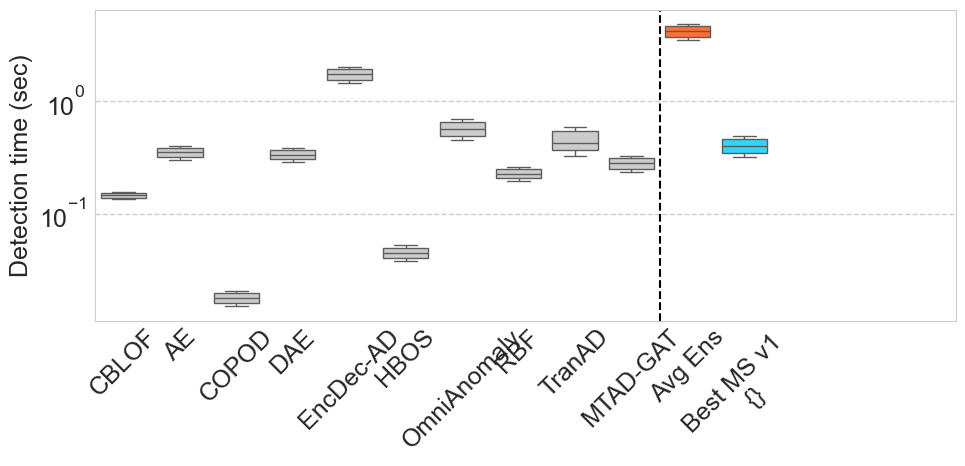

In [14]:
def plot_result_boxplot_dataset():    
    plt.rcParams.update({'font.size': 18})
    plt.figure(figsize=(10, 5))
    plt.grid(color='k', linestyle='--', linewidth=1, alpha=0.2)
    # best_ms = 'resnet_1024'
#     best_ms = 'convnet_128'
    best_ms = 'rocket_32'
    best_ms = 'decision_tree_128'
    
    # old_method_order = ['LSTM', 'LOF', 'CNN', 'AE', 'IFOREST', 'HBOS', 'MP', 'IFOREST1', 'NORMA', 'OCSVM', 'PCA', 'POLY']
    # old_method_order =['CBLOF', 'COF', 'COPOD','HBOS','LOF','PCC']
    # old_method_order = ['CBLOF', 'RobustPCA', 'COPOD', 'HBOS', 'LOF', 'PCC', 'AutoEncoder (AE)', 'DenoisingAutoEncoder (DAE)', 'Torsk', 'Random Black Forest (RR)']
    old_method_order = detector_names
    my_pal = {method: methods_colors["detectors"] for method in old_method_order}
    my_pal = {**my_pal, **{"Avg Ens": methods_colors["avg_ens"], best_ms: methods_colors["best_ms"],'Oracle': methods_colors["oracle"] }}
    
    tmp_methods = old_method_order + ['Avg Ens', best_ms]
    log_time_df = pd.DataFrame(np.log(df[tmp_methods]), columns=tmp_methods)
    bplot = sns.boxplot(data=df[tmp_methods], palette=my_pal, showfliers = False, saturation=1, whis=0.241289844)
    
    xticks_labels = []
    for x in tmp_methods:
        if x != best_ms:
            xticks_labels.append(final_names[x])
        else:
            xticks_labels.append(final_names['best_ms'])
    
    plt.xticks(list(range(len(xticks_labels))), xticks_labels, rotation=45)
    plt.ylabel('Detection time (sec)')

    plt.yscale('log')
    plt.axvline(9.5, color='black', linestyle='--')
    plt.xlim(-0.5, 14.75)
    plt.tight_layout()
#     plt.savefig(figure_path.format('1_intro_fig_2'), transparent=True)
    plt.show()
    
plot_result_boxplot_dataset()

# Overall execution time analysis

We now discuss the execution time of the different model selection methods. In this section,
we focus only on the inference time (i.e., the number of seconds
required by a method to predict the detector to use and to run it).
The following figure depicts the inference time (in log scale) for each method
and detector in the TSB-UAD benchmark. We first observe that the
Averaging ensembling required to run all detectors is significantly
slower than the rest. Then, all model selection methods are of the
same order of magnitude as the detectors. We also observe that
all the deep learning methods are slower than the feature-based
approaches. This is surprising because the inference time mainly
depends on the chosen detector. Overall, we conclude that method
selection is the only viable solution that outperforms the existing
anomaly detection methods and can be executed in the same order
of magnitude of time.

In [15]:
def rreplace(s, old, new, occurrence=1):
    li = s.rsplit(old, occurrence)
    return new.join(li)

/var/folders/5j/s9hphkqj409f3hqysls2hfzh0000gn/T/ipykernel_49458/962962824.py:43: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.axes.set_xticklabels(new_xticks_labels)


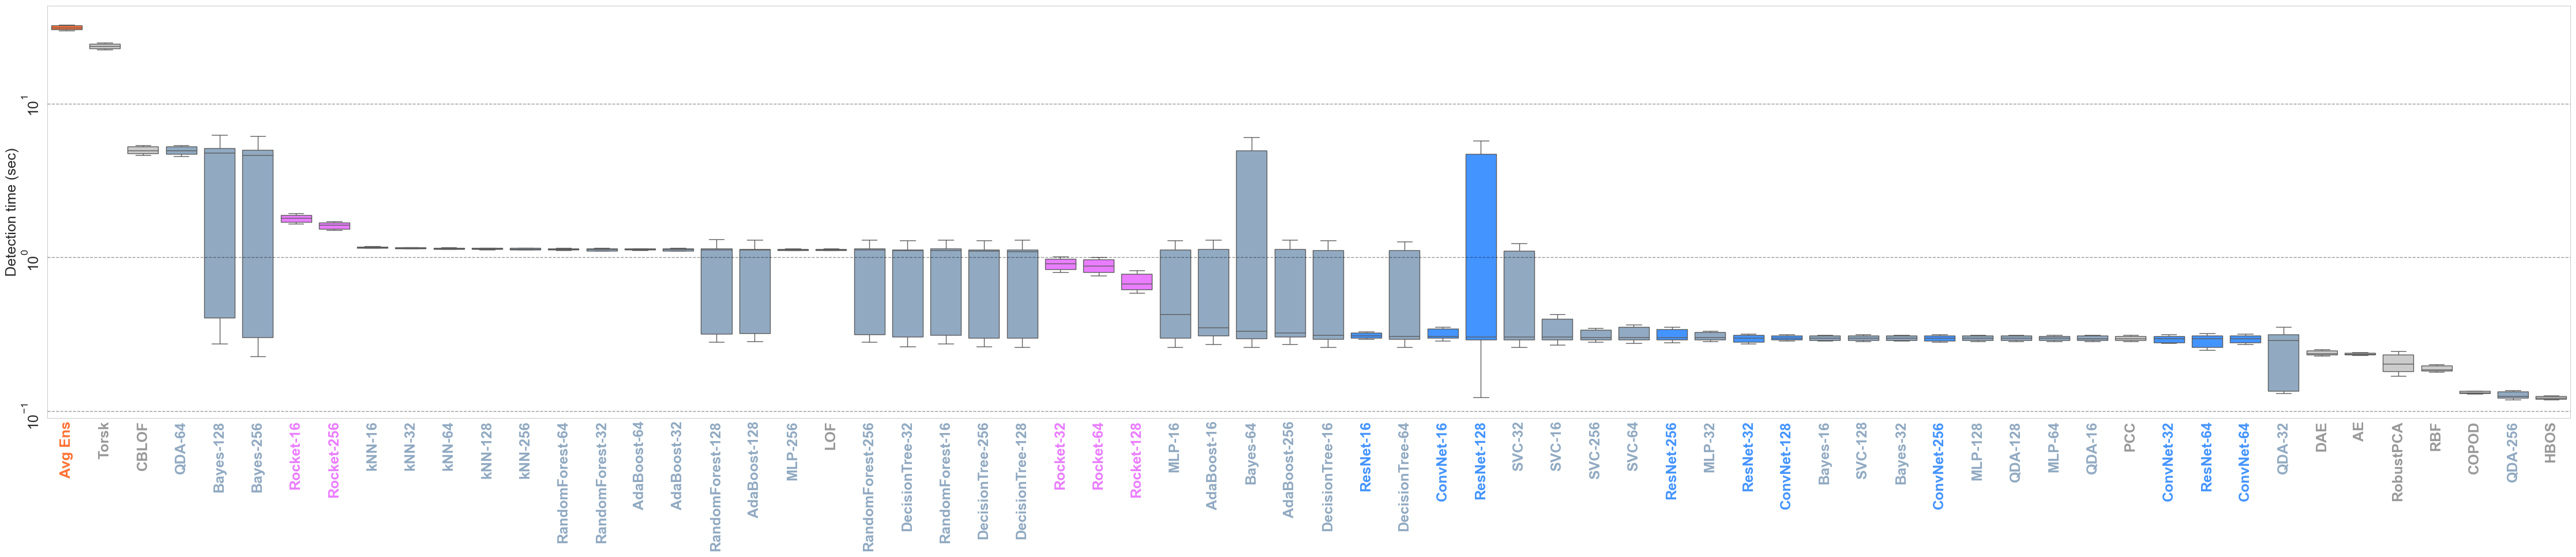

In [16]:
plt.rcParams.update({'font.size': 18})
plt.figure(figsize=(45, 10))
plt.grid(color='k', linestyle='--', linewidth=1, alpha=0.4)

order = list(df[all_methods].median().sort_values().index)[::-1]

my_pal = {method: methods_colors["detectors"] for method in old_methods}
for family, color in zip([methods_conv, methods_sit, methods_ts, methods_feature], [methods_colors["conv"], methods_colors["sit"], methods_colors["rocket"],methods_colors["feature_based"]]):
    for length in all_length:
        my_pal_tmp = {method.format(length):color for method in family}
        my_pal = {**my_pal, **my_pal_tmp}
my_pal = {**my_pal,**{"Avg Ens": methods_colors["avg_ens"], 'Oracle': methods_colors["oracle"]}}

g = sns.boxplot(data=df[order], palette=my_pal, order=order, saturation=1, whis=0.241289844, showfliers=False) # 1std = 0.241289844, 2std = 0.982579689
g.set_axisbelow(False)

for tick_label in g.axes.get_xticklabels():
    tick_label.set_weight('bold')
    if 'sit_' in tick_label.get_text():
        tick_label.set_color(methods_colors["sit"])
    elif ('convnet_' in tick_label.get_text()) or ('resnet_' in tick_label.get_text()) or ('inception_' in tick_label.get_text()):
        tick_label.set_color(methods_colors["conv"])
    elif 'rocket_' in tick_label.get_text():
        tick_label.set_color(methods_colors["rocket"])
    elif ('Oracle' in tick_label.get_text()):
        tick_label.set_color("black")
    elif ('Avg Ens' in tick_label.get_text()):
        tick_label.set_color(methods_colors["avg_ens"])
    elif '_'not  in tick_label.get_text():
        tick_label.set_color("#999999")
    else:
        tick_label.set_color(methods_colors["feature_based"])

# Change xtick labels to camera-ready names
new_xticks_labels = []
for i, tick_label in enumerate(g.axes.get_xticklabels()):
    method_name = tick_label.get_text()
    if method_name in final_names:
        tick_label.set_text(final_names[method_name])
    else:
        tick_label.set_text(method_name)
    new_xticks_labels.append(tick_label)
g.axes.set_xticklabels(new_xticks_labels)

plt.yscale('log')
plt.xticks(rotation=90)
plt.yticks(rotation=90)
plt.ylabel("Detection time (sec)")

plt.tight_layout()
# plt.savefig(figure_path.format('5_overall_results_full_2'))
plt.show()
plt.close()

KeyError: "['sit_stem_relu_768', 'sit_stem_512', 'sit_conv_1024', 'sit_linear_768', 'inception_time_768', 'random_forest_1024', 'svc_linear_768', 'NORMA', 'MP', 'qda_768', 'AE', 'IFOREST1', 'PCA', 'CNN', 'IFOREST', 'LSTM', 'OCSVM', 'POLY'] not in index"

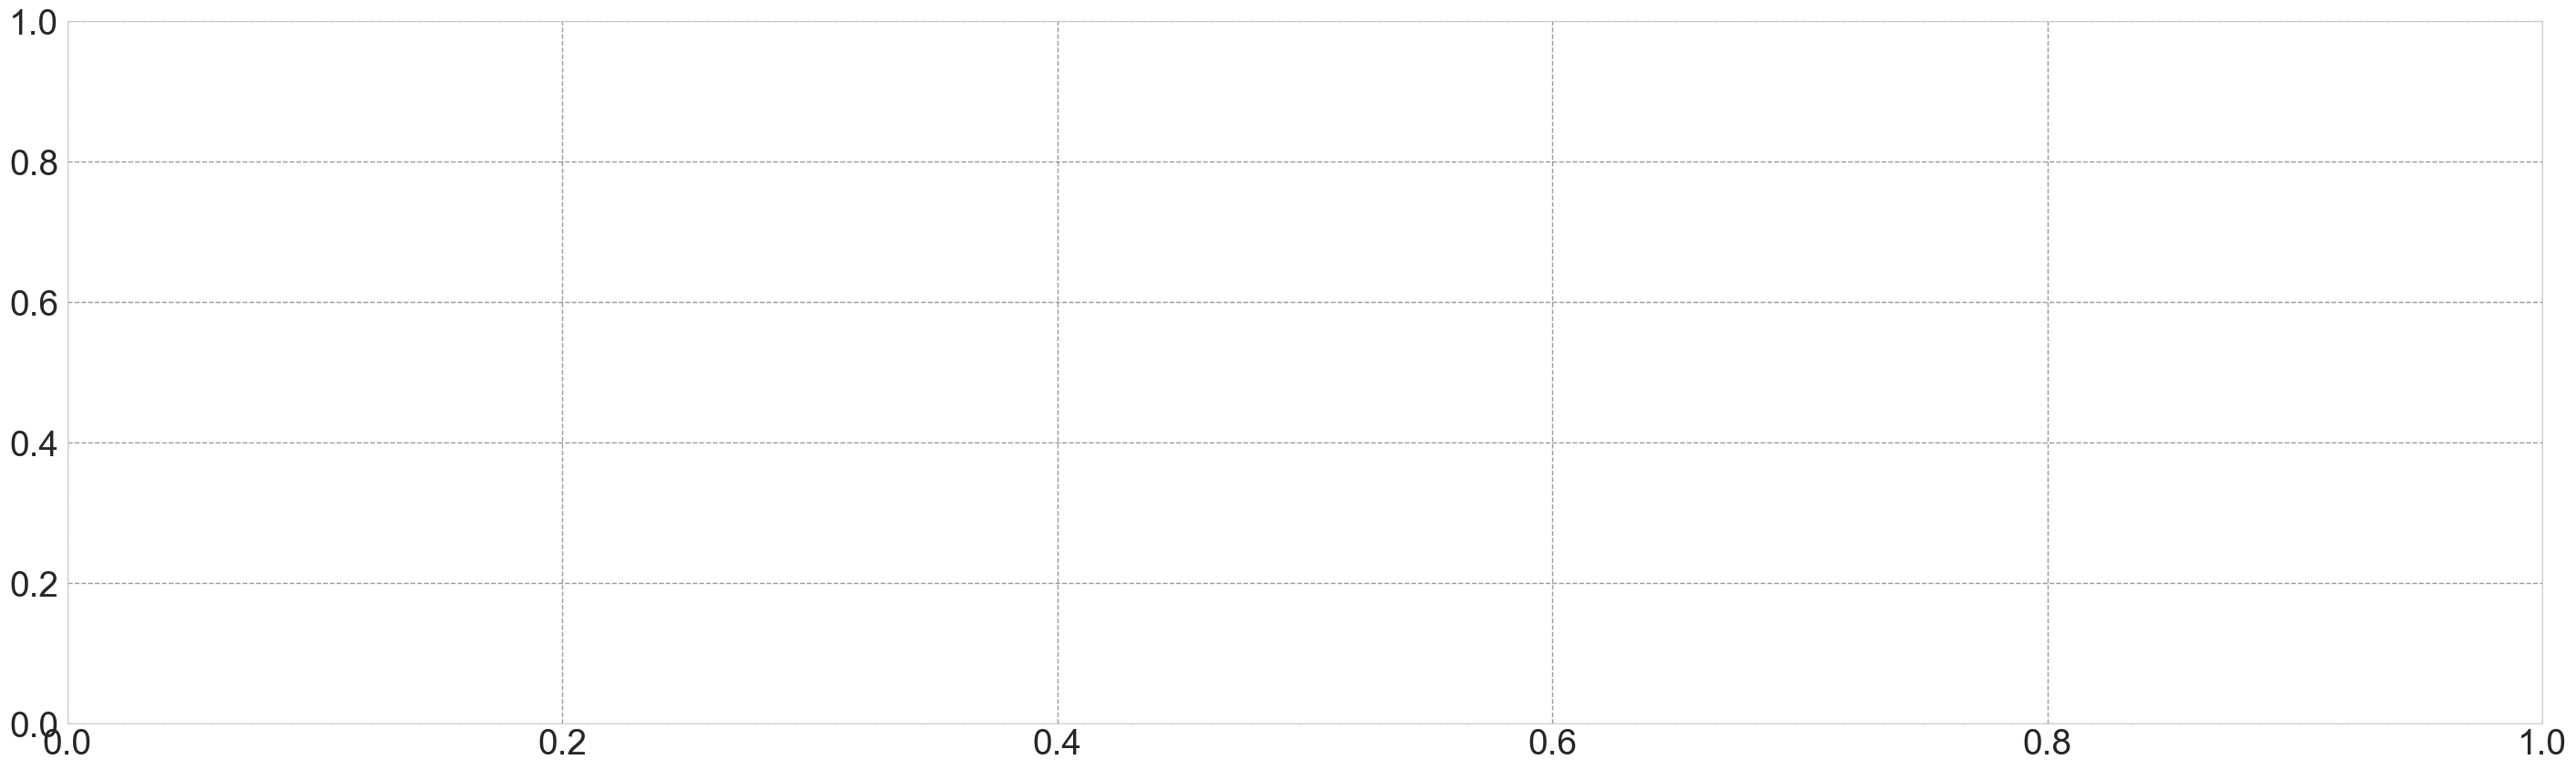

In [17]:
plt.rcParams.update({'font.size': 28})
plt.figure(figsize=(35, 10))
plt.grid(color='k', linestyle='--', linewidth=1, alpha=0.4)

accuracy_plot_methods = ['convnet_128', 'resnet_64', 'sit_stem_relu_768', 'sit_stem_512', 'sit_conv_1024', 'sit_linear_768', 'inception_time_768', 'rocket_128', 'knn_32', 'random_forest_1024', 'decision_tree_128', 'ada_boost_16', 'bayes_256', 'mlp_256', 'svc_linear_768', 'Avg Ens', 'NORMA', 'MP', 'qda_768', 'LOF', 'AE', 'IFOREST1', 'PCA', 'HBOS', 'CNN', 'IFOREST', 'LSTM', 'OCSVM', 'POLY']
order = list(df[accuracy_plot_methods].median().sort_values().index)[::-1]

my_pal = {method: methods_colors["detectors"] for method in old_methods}
for family, color in zip([methods_conv, methods_sit, methods_ts, methods_feature], [methods_colors["conv"], methods_colors["sit"], methods_colors["rocket"],methods_colors["feature_based"]]):
    for length in all_length:
        my_pal_tmp = {method.format(length):color for method in family}
        my_pal = {**my_pal, **my_pal_tmp}
my_pal = {**my_pal,**{"Avg Ens": methods_colors["avg_ens"], 'Oracle': methods_colors["oracle"]}}

# Keep only the fastest from each method class
# best_method_class = []
# reversed_order = order[::-1]
# split_order = [x.rsplit('_', 1)[0] for x in reversed_order]
# for method_class in all_methods_class:
#     indexes = split_order.index(method_class)
#     best_method_class.append(reversed_order[indexes])
# new_order = [x for x in order if x in best_method_class]
# new_my_pal = {key: my_pal[key] for key in best_method_class}

g = sns.boxplot(data=df[order], palette=my_pal, order=order, saturation=1, whis=0.241289844, showfliers=False) # 1std = 0.241289844, 2std = 0.982579689
g.set_axisbelow(False)

for tick_label in g.axes.get_xticklabels():
    tick_label.set_weight('bold')
    if 'sit_' in tick_label.get_text():
        tick_label.set_color(methods_colors["sit"])
    elif ('convnet_' in tick_label.get_text()) or ('resnet_' in tick_label.get_text()) or ('inception_' in tick_label.get_text()):
        tick_label.set_color(methods_colors["conv"])
    elif 'rocket_' in tick_label.get_text():
        tick_label.set_color(methods_colors["rocket"])
    elif ('Oracle' in tick_label.get_text()):
        tick_label.set_color("black")
    elif ('Avg Ens' in tick_label.get_text()):
        tick_label.set_color(methods_colors["avg_ens"])
    elif '_'not  in tick_label.get_text():
        tick_label.set_color("#999999")
    else:
        tick_label.set_color(methods_colors["feature_based"])

# Change xtick labels to camera-ready names
new_xticks_labels = []
for i, tick_label in enumerate(g.axes.get_xticklabels()):
    method_name = tick_label.get_text()
    if method_name in final_names:
        tick_label.set_text(rreplace(final_names[method_name], '-', '\n'))
    else:
        tick_label.set_text(method_name)
    new_xticks_labels.append(tick_label)
g.axes.set_xticklabels(new_xticks_labels)

plt.yscale('log')
plt.xticks(rotation=100)
plt.yticks(rotation=90)
plt.ylabel("(b) Detection time (sec)")
plt.tight_layout()
# plt.savefig(figure_path.format('5_overall_results_2'))
plt.show()
plt.close()

# Overall prediction time

In this section, we analyse the prediction time: the amount of time required to choose a model.

In [9]:
plt.rcParams.update({'font.size': 18})
plt.figure(figsize=(45, 6))
plt.grid(color='k', linestyle='--', linewidth=1, alpha=0.4)

order = list(df[all_methods_pred].median().sort_values().index)[::-1]

my_pal = {}
for family, color in zip([methods_conv, methods_sit, methods_ts, methods_feature], [methods_colors["conv"], methods_colors["sit"], methods_colors["rocket"], methods_colors["feature_based"]]):
    for length in all_length:
        my_pal_tmp = {method.format(length)+"_pred": color for method in family}
        my_pal = {**my_pal,**my_pal_tmp}

g = sns.boxplot(data=df[all_methods_pred], palette=my_pal, order=order, saturation=1, whis=0.241289844, showfliers=False) # 1std = 0.241289844, 2std = 0.982579689
g.set_axisbelow(True)

for tick_label in g.axes.get_xticklabels():
    tick_label.set_weight('bold')
    if 'sit_' in tick_label.get_text():
        tick_label.set_color(methods_colors["sit"])
    elif ('convnet_' in tick_label.get_text()) or ('resnet_' in tick_label.get_text()) or ('inception_' in tick_label.get_text()):
        tick_label.set_color(methods_colors["conv"])
    elif 'rocket_' in tick_label.get_text():
        tick_label.set_color(methods_colors["rocket"])
    elif ('Oracle' in tick_label.get_text()):
        tick_label.set_color("black")
    elif ('Avg Ens' in tick_label.get_text()):
        tick_label.set_color(methods_colors["avg_ens"])
    elif '_'not  in tick_label.get_text():
        tick_label.set_color("#999999")
    else:
        tick_label.set_color(methods_colors["feature_based"])

# Change xtick labels to camera-ready names
new_xticks_labels = []
for i, tick_label in enumerate(g.axes.get_xticklabels()):
    method_name = tick_label.get_text().rsplit('_', 1)[0]
    if method_name in final_names:
        tick_label.set_text(final_names[method_name])
    else:
        tick_label.set_text(method_name)
    new_xticks_labels.append(tick_label)
g.axes.set_xticklabels(new_xticks_labels)

plt.yscale('log')
plt.xticks(rotation=90)
plt.yticks(rotation=90)
# plt.tight_layout()
plt.ylabel("Selection time (s)")
plt.show()

# Overall Training time

In this section, we analyse the training time: the amount of time required to train a model (as done sequentially for CPU usage).

In [10]:
df_training = pd.read_csv('../../results/execution_time/all_training_time.csv')
df_training = df_training.drop(labels='Unnamed: 0',  axis=1)
df_training

In [11]:
plt.rcParams.update({'font.size': 13})

fig = plt.figure(figsize=(5.5, 3.5))

plt.plot(df_training['window_size'].values,  df_training['conv_based (avg)'].values,  color=methods_colors['conv'])
plt.scatter(df_training['window_size'].values, df_training['conv_based (avg)'].values,  marker='o', facecolors=methods_colors['conv'], s=50, edgecolors =methods_colors['conv'])

plt.plot(df_training['window_size'].values, df_training['tranformer_based (avg)'].values, color=methods_colors['sit'])
plt.scatter(df_training['window_size'].values, df_training['tranformer_based (avg)'].values, marker='s', facecolors='none', s=50, edgecolors=methods_colors['sit'])

plt.plot(df_training['window_size'].values, df_training['feature_based (avg)'].values, color=methods_colors['feature_based'])
plt.scatter(df_training['window_size'].values, df_training['feature_based (avg)'].values, marker='^', facecolors='none', s=50, edgecolors=methods_colors['feature_based'])

plt.plot(df_training['window_size'].values, df_training['rocket'].values, color=methods_colors['rocket'])
plt.scatter(df_training['window_size'].values, df_training['rocket'].values, marker='x', c=methods_colors['rocket'], s=50)
plt.xscale('log')
plt.yscale('log')
plt.xlim(16, 1024)
# plt.xlabel('window length (log scale)')
# plt.ylabel('time (seconds)')
plt.tight_layout()
# plt.savefig(figure_path.format("8_window_length_4"))
plt.show()
plt.close()

plt.figure(figsize=(10, 5))
plt.subplot(2, 2, 1)
for method in methods_conv:
    plt.plot(df_training['window_size'].values, df_training[method.format('')[:-1]].values, color=methods_colors['conv'])
    plt.scatter(df_training['window_size'].values, df_training[method.format('')[:-1]].values, marker='o', facecolors=methods_colors['conv'], s=50, edgecolors =methods_colors['conv'])
plt.xscale('log')
plt.yscale('log')
plt.xlim(16, 1024)
plt.xlabel('window length (log scale)')
plt.ylabel('time (seconds)')

plt.subplot(2, 2, 2)
for method in methods_sit:
    plt.plot(df_training['window_size'].values, df_training[method.format('')[:-1]].values, color=methods_colors['sit'])
    plt.scatter(df_training['window_size'].values, df_training[method.format('')[:-1]].values, marker='o', facecolors=methods_colors['sit'], s=50, edgecolors =methods_colors['sit'])
plt.xscale('log')
plt.yscale('log')
plt.xlim(16, 1024)
plt.xlabel('window length (log scale)')
plt.ylabel('time (seconds)')

plt.subplot(2, 2, 3)
for method in methods_feature:
    plt.plot(df_training['window_size'].values, df_training[method.format('')[:-1]].values, color=methods_colors['feature_based'])
    plt.scatter(df_training['window_size'].values, df_training[method.format('')[:-1]].values, marker='o', facecolors=methods_colors['feature_based'], s=50, edgecolors =methods_colors['feature_based'])
plt.xscale('log')
plt.yscale('log')
plt.xlim(16, 1024)
plt.xlabel('window length (log scale)')
plt.ylabel('time (seconds)')

plt.subplot(2, 2, 4)
for method in methods_ts:
    plt.plot(df_training['window_size'].values, df_training[method.format('')[:-1]].values, color=methods_colors['rocket'])
    plt.scatter(df_training['window_size'].values, df_training[method.format('')[:-1]].values, marker='o', facecolors=methods_colors['rocket'], s=50, edgecolors =methods_colors['rocket'])
plt.xscale('log')
plt.yscale('log')
plt.xlim(16, 1024)
plt.xlabel('window length (log scale)')
plt.ylabel('time (seconds)')
plt.tight_layout()


# Influence of the window length

In this section, we analyze the influence of the window length on
the execution time. We perform
the analysis per group of methods (i.e., average performances for
Convolutional, Transformer, rocket, and Feature-based methods).

In [12]:
def plot_mean_length(df, replace_str=''):
    fig = plt.figure(figsize=(5.5, 3.5))
    mean_sit, mean_conv, mean_feature, mean_ts = [], [], [], []
    for method in methods_conv + methods_feature + methods_sit + methods_ts:
        to_plot = [method.format(length) + replace_str for length in all_length]
        ts_length = df[to_plot].mean().values
        if method in methods_sit:
            mean_sit.append(ts_length)
        elif method in methods_feature:
            mean_feature.append(ts_length)
        elif method in methods_conv:
            mean_conv.append(ts_length)
        elif method in methods_ts:
            mean_ts.append(ts_length)
    
    
    plt.plot(all_length, np.mean(mean_conv, 0), color=methods_colors['conv'])
    plt.scatter(all_length, np.mean(mean_conv, 0), marker='o', facecolors=methods_colors['conv'], s=50, edgecolors =methods_colors['conv'])
    plt.plot(all_length, np.mean(mean_sit, 0), color=methods_colors['sit'])
    plt.scatter(all_length, np.mean(mean_sit, 0), marker='s', facecolors='none', s=50, edgecolors =methods_colors['sit'])
    plt.plot(all_length, np.mean(mean_feature, 0), color=methods_colors['feature_based'])
    plt.scatter(all_length, np.mean(mean_feature, 0), marker='^', facecolors='none', s=50, edgecolors =methods_colors['feature_based'])
    plt.plot(all_length, np.mean(mean_ts, 0), color=methods_colors['rocket'])
    plt.scatter(all_length, np.mean(mean_ts, 0), marker='x', c=methods_colors['rocket'], s=50)
    plt.xscale('log')
    plt.xlim(16, 1024)
#     plt.xlabel('window length (log scale)')
#     plt.ylabel('time (seconds)')
#     if replace_str == '':
#         plt.title('Inference Time of methods family vs length')
#     else:
#         plt.title('Prediction Time of methods family vs length')
    plt.tight_layout()
#     if len(replace_str) > 0:
#         plt.savefig(figure_path.format("8_window_length_5"))
#     else:
#         plt.savefig(figure_path.format("8_window_length_6"))
    plt.show()
    plt.close()

        

plot_mean_length(df, replace_str='_pred')
plot_mean_length(df, replace_str='')